In [2]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score, confusion_matrix, r2_score
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
from joblib import dump, load
import warnings
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
import sklearn.metrics as metrics
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

In [3]:
file_name = 'house_price_train.csv'
df = pd.read_csv(file_name)

test_df = pd.read_csv('house_price_test.csv')

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['waterfront'].mean()
df['waterfront'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

mean=df['floors'].mean()
df['floors'].replace(np.nan,mean, inplace=True)

mean=df['view'].mean()
df['view'].replace(np.nan,mean, inplace=True)

mean=df['sqft_above'].mean()
df['sqft_above'].replace(np.nan,mean, inplace=True)

mean=df['condition'].mean()
df['condition'].replace(np.nan,mean, inplace=True)

mean=df['price'].mean()
df['price'].replace(np.nan,mean, inplace=True)



rv_df = df.drop(columns=['id', 'date', 'yr_built', 'street', 'yr_renovated', 'statezip', 'city', 'country'])

rv_df.head(10)



# Guardamos este rv_df, el cual tiene las características de la infraestructura en sí de la casa.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,price
0,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,685000.0
1,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,857000.0
2,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,675000.0
3,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,1485000.0
4,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,561000.0
5,5.0,3.00,2430,8000,1.0,0,0,4,1370,1060,506000.0
6,4.0,2.25,2570,9503,2.0,0,0,3,2570,0,439000.0
7,3.0,1.75,1700,8432,1.0,0,0,3,1230,470,475000.0
8,1.0,1.25,1100,638,3.0,0,0,3,1100,0,516500.0
9,5.0,2.00,1700,7314,1.0,0,0,3,1000,700,337500.0


In [4]:
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3683,2014-06-30 00:00:00,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0,6710 Alonzo Ave NW,Seattle,WA 98117,USA
1,4411,2014-05-22 00:00:00,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA
2,2584,2014-06-16 00:00:00,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000,150 Highland Dr,Seattle,WA 98109,USA
3,69,2014-05-04 00:00:00,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA
4,1844,2014-06-04 00:00:00,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009,31607 45th Pl SW,Federal Way,WA 98023,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1612,2014-05-30 00:00:00,3.0,1.75,1700,8400,1.0,0,0,3,1460,240,1947,2012,3621 45th Ave W,Seattle,WA 98199,USA
916,1068,2014-05-21 00:00:00,5.0,2.00,1930,6120,1.5,0,0,3,1930,0,1941,1969,10645 2nd Ave SW,Seattle,WA 98146,USA
917,4350,2014-07-03 00:00:00,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
918,3027,2014-06-22 00:00:00,4.0,2.50,2370,10083,2.0,0,0,5,2370,0,1966,0,13010 NE 74th St,Kirkland,WA 98033,USA


In [5]:
#data_df = data_df.drop(columns=['date'])
num_df = rv_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = num_df.corr()
#print(correlation_matrix)

price_correlation1 = correlation_matrix[['price']].sort_values(by='price', ascending=False)
price_correlation1

,price
price,1.000000
sqft_living,0.679567
sqft_above,0.576975
bathrooms,0.503323
view,0.359010
sqft_basement,0.335466
bedrooms,0.313703
floors,0.254857
waterfront,0.222845
sqft_lot,0.076779


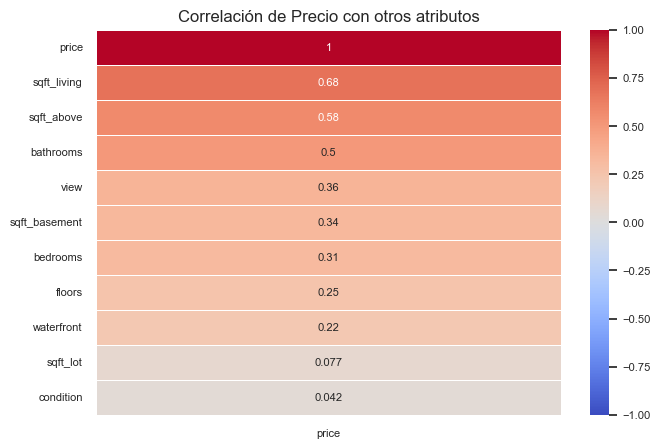

In [6]:
plt.figure(figsize=(7.5, 5))

# Crear el mapa de calor
sns.heatmap(price_correlation1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Configurar el título y etiquetas
plt.title('Correlación de Precio con otros atributos')
plt.show()

Observamos que lo más importante a la hora de comparar precios es el tamaño de la vivienda, los pies cuadrados del espacio interior de la vivienda que están por encima del nivel del suelo, y de los baños de ésta.

Mientras que los menos relevantes son la condición de la vivienda o el tamaño del terreno.

In [7]:
one_hot_encoded = pd.get_dummies(df['city'])
df_encoded = pd.concat([df['price'], one_hot_encoded], axis=1)

df_app = pd.concat([df['price'], one_hot_encoded], axis=1)

rv2_df = pd.concat([rv_df, one_hot_encoded], axis=1)

cm_ndf = df_app.corr()

# Extraer solo la correlación de 'price' con las demás características
price_correlation = cm_ndf[['price']].sort_values(by='price', ascending=False)

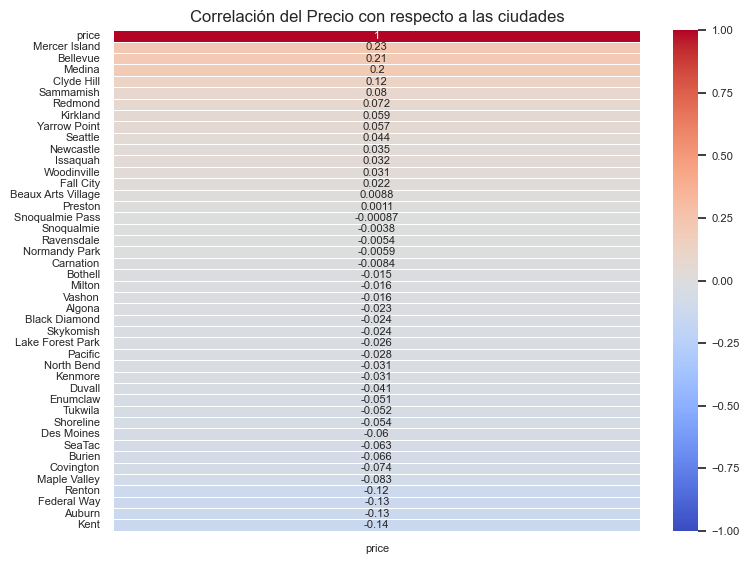

In [8]:
plt.figure(figsize=(8.5, 6.5))

# Crear el mapa de calor
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Configurar el título y etiquetas
plt.title('Correlación del Precio con respecto a las ciudades')
plt.show()

Con esto podemos ver que hay un par de ciudades que son bastante relevantes con respecto al precio de las viviendas, así como suelen ser más caras en ciudades como Mercer Island o Bellevue, mientras que más baratas en Kent o Auburn.

In [9]:
X=np.asarray(rv2_df.drop(columns=['price']))
Y=np.asarray(rv2_df['price'])
X = skp.StandardScaler().fit(X).transform(X)

X2=np.asarray(test_df)
Y2=np.asarray(rv2_df['price'])
X2 = skp.StandardScaler().fit(X).transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=920, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=920, random_state=42)

print("number of test samples:", x_test2.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 920
number of training samples: 2760


#### Entrenamos el modelo

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_hat = model.predict(x_test2)

#### Calculamos los errores de interés

In [12]:

LinearRegression_MAE = np.mean(np.absolute(y_hat - y_test))
LinearRegression_MSE = np.mean((y_hat - y_test)**2)
#LinearRegression_R2 = r2_score(y_test, y_hat)
#LinearRegression_cv = cross_val_score(model, x_test.append(1), y_test, cv=5)
#cv_score = LinearRegression_cv.mean()
#cv_score

pd.DataFrame({"Métrica": ["MAE", "MSE"], "Score": [LinearRegression_MAE, LinearRegression_MSE]})

,Métrica,Score
0,MAE,4.369721e+14
1,MSE,1.756690e+32


Encontramos errores con valores demasiado altos, ploteamos la distribución de *y_hat* para ver qué ocurre

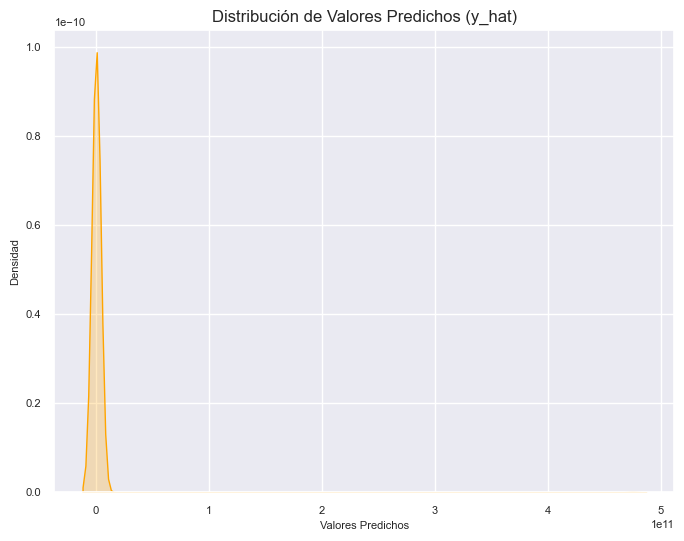

In [17]:
# Graficar un gráfico de densidad de y_hat
plt.figure(figsize=(8, 6))
sns.kdeplot(y_hat, color='orange', shade=True)
plt.title('Distribución de Valores Predichos (y_hat)')
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.show()


Efectivamente, hay un valor extremadamente atípico en los resultados de las predicciones, arruinando así los valores de los errores MSE y MAE.

Quitamos entonces este valor extraño y lo reemplazamos por el precio promedio.

In [19]:
y_hat = [np.mean(np.abs(y_hat)) if np.abs(x) >= 474970187753.07477 else x for x in y_hat]
len(y_hat)

920

In [20]:
hat_df = pd.DataFrame({'id': test_df['id'], 'price': np.abs(y_hat)})
hat_df.to_csv('submit.csv', index=False)

